In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# upload and read excel file 
df = pd.read_csv('/Users/adamoubaita/Downloads/2025 New Verticals Analytics Exercise  - Dataset.csv', header = 1)

In [ ]:
# check schema of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60583 entries, 0 to 60582
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DELIVERY_UUID                   60583 non-null  object 
 1   DELIV_CREATED_AT                60583 non-null  object 
 2   Deliv_Date                      60583 non-null  object 
 3   Deliv_Time                      60583 non-null  object 
 4   DELIV_STORE_NAME                60583 non-null  object 
 5   DELIV_DASHER_ID                 59574 non-null  float64
 6   DELIV_SUBMARKET                 60583 non-null  object 
 7   DELIV_D2R                       59296 non-null  float64
 8   DELIV_IS_20_MIN_LATE            60583 non-null  int64  
 9   DELIV_CLAT                      58190 non-null  float64
 10  DELIV_CANCELLED_AT              669 non-null    object 
 11  DELIV_MISSING_INCORRECT_REPORT  60583 non-null  bool   
 12  WAS_REQUESTED                   

In [ ]:
df.nunique()

DELIVERY_UUID                     13085
DELIV_CREATED_AT                  13029
Deliv_Date                           30
Deliv_Time                        11736
DELIV_STORE_NAME                      4
DELIV_DASHER_ID                    2328
DELIV_SUBMARKET                       1
DELIV_D2R                          1137
DELIV_IS_20_MIN_LATE                  2
DELIV_CLAT                         1522
DELIV_CANCELLED_AT                  204
DELIV_MISSING_INCORRECT_REPORT        2
WAS_REQUESTED                         1
WAS_MISSING                           2
WAS_SUBBED                            2
WAS_FOUND                             2
ITEM_NAME                         13275
ITEM_PRICE                          556
ITEM_CATEGORY                        27
SUBSTITUTE_ITEM_NAME               2089
SUBSTITUTE_ITEM_CATEGORY             24
dtype: int64

In [ ]:
df.describe()

,DELIV_DASHER_ID,DELIV_D2R,DELIV_IS_20_MIN_LATE,DELIV_CLAT,WAS_REQUESTED,WAS_MISSING,WAS_SUBBED,WAS_FOUND,ITEM_PRICE
count,5.957400e+04,59296.000000,60583.000000,58190.000000,60583.0,60583.000000,60583.000000,60583.000000,60583.000000
mean,1.068842e+07,4.178952,0.047423,4.535178,1.0,0.062493,0.042718,0.932390,4.969335
std,6.564766e+06,12.389168,0.212543,7.907620,0.0,0.242050,0.202223,0.251077,4.209347
min,2.172560e+05,0.000000,0.000000,0.050000,1.0,0.000000,0.000000,0.000000,0.290000
25%,5.250623e+06,0.550000,0.000000,0.283333,1.0,0.000000,0.000000,1.000000,2.590000
50%,1.013477e+07,2.716667,0.000000,1.500000,1.0,0.000000,0.000000,1.000000,3.990000
75%,1.665884e+07,5.566667,0.000000,5.616667,1.0,0.000000,0.000000,1.000000,5.990000
max,2.291942e+07,1313.500000,1.000000,119.783333,1.0,1.000000,1.000000,1.000000,160.950000


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
df["utc_datetime"] = pd.to_datetime(df["DELIV_CREATED_AT"], utc = True)
df["local_datetime"] = df["utc_datetime"].dt.tz_convert("America/New_York")
df["deliv_date"] = df["local_datetime"].dt.date
df["deliv_time"] = df["local_datetime"].dt.time

In [ ]:
df.tail()

,DELIVERY_UUID,DELIV_CREATED_AT,Deliv_Date,Deliv_Time,DELIV_STORE_NAME,DELIV_DASHER_ID,DELIV_SUBMARKET,DELIV_D2R,DELIV_IS_20_MIN_LATE,DELIV_CLAT,...,WAS_FOUND,ITEM_NAME,ITEM_PRICE,ITEM_CATEGORY,SUBSTITUTE_ITEM_NAME,SUBSTITUTE_ITEM_CATEGORY,utc_datetime,local_datetime,deliv_date,deliv_time
60578,1206ebad-aeda-4f8f-9b8e-5da49966d466,2022-09-15 0:01:11,2022-09-15,0:01:11,DashMart1,10890955.0,Cincinnati,3.1,0,17.483333,...,1,Cheryl's Snickerdoodle Cookie (1ct),1.99,Snacks,NaN,NaN,2022-09-15 00:01:11+00:00,2022-09-14 20:01:11-04:00,2022-09-14,20:01:11
60579,1206ebad-aeda-4f8f-9b8e-5da49966d466,2022-09-15 0:01:11,2022-09-15,0:01:11,DashMart1,10890955.0,Cincinnati,3.1,0,17.483333,...,1,DiGiorno Three Meat Rising Crust Pizza (29oz),9.99,Frozen,NaN,NaN,2022-09-15 00:01:11+00:00,2022-09-14 20:01:11-04:00,2022-09-14,20:01:11
60580,1206ebad-aeda-4f8f-9b8e-5da49966d466,2022-09-15 0:01:11,2022-09-15,0:01:11,DashMart1,10890955.0,Cincinnati,3.1,0,17.483333,...,1,Coke Soda Bottle (20 oz),2.59,Drinks,NaN,NaN,2022-09-15 00:01:11+00:00,2022-09-14 20:01:11-04:00,2022-09-14,20:01:11
60581,b27da6db-b5a9-4307-aff8-678de71aa0a5,2022-09-15 0:00:46,2022-09-15,0:00:46,DashMart1,2163056.0,Cincinnati,6.0,0,7.783333,...,1,Haagen-Dazs Ice Cream Bars Vanilla Milk Chocol...,6.49,Ice Cream,NaN,NaN,2022-09-15 00:00:46+00:00,2022-09-14 20:00:46-04:00,2022-09-14,20:00:46
60582,b27da6db-b5a9-4307-aff8-678de71aa0a5,2022-09-15 0:00:46,2022-09-15,0:00:46,DashMart1,2163056.0,Cincinnati,6.0,0,7.783333,...,1,Clearblue Rapid Detection Pregnancy Test (1 ct),7.99,Personal Care,NaN,NaN,2022-09-15 00:00:46+00:00,2022-09-14 20:00:46-04:00,2022-09-14,20:00:46


In [ ]:
df["deliv_date"] = pd.to_datetime(df["deliv_date"])
df["day_of_week"] = df["deliv_date"].dt.day_name()
df[["deliv_date", "day_of_week"]].head(10)

,deliv_date,day_of_week
0,2022-10-14,Friday
1,2022-10-14,Friday
2,2022-10-14,Friday
3,2022-10-14,Friday
4,2022-10-14,Friday
5,2022-10-14,Friday
6,2022-10-14,Friday
7,2022-10-14,Friday
8,2022-10-14,Friday
9,2022-10-14,Friday


In [ ]:
df["cancelled_utc_datetime"] = pd.to_datetime(df["DELIV_CANCELLED_AT"], utc = True, errors = "coerce")
df["cancelled_local_datetime"] = df["cancelled_utc_datetime"].dt.tz_convert("America/New_York")
df["cancelled_deliv_date"] = df["cancelled_local_datetime"].dt.date
df["cancelled_deliv_time"] = df["cancelled_local_datetime"].dt.time



In [ ]:
df["cancelled_day_of_week"] = df["cancelled_local_datetime"].dt.day_name()
df[["cancelled_deliv_date", "cancelled_day_of_week"]].head(10)

,cancelled_deliv_date,cancelled_day_of_week
0,NaT,NaN
1,NaT,NaN
2,NaT,NaN
3,NaT,NaN
4,NaT,NaN
5,NaT,NaN
6,NaT,NaN
7,NaT,NaN
8,NaT,NaN
9,NaT,NaN


In [ ]:
# True duplicates (identical rows)
dupes = df[df.duplicated()]
print(len(dupes))

# Optional: drop exact duplicates
df = df.drop_duplicates()

# Check if any DELIVERY_UUIDs are fully duplicated across item attributes
df.groupby("DELIVERY_UUID").size().sort_values(ascending=False).head(10)


3


DELIVERY_UUID
aa0b41e1-b761-4499-aca1-3df852ae562d    44
c9812b85-ea4d-4864-9bf5-339229b24d1c    43
94d2766a-f14c-4e3a-a4ab-bc0f48fdaab1    42
4aa3f81d-aaba-4578-b35d-88be4bfdb293    42
ec1b3895-5584-465a-a25a-8f252eab4d0d    40
1f3f1fd4-cfa6-446e-a557-24425e890ca2    39
858681f2-92b5-480d-ac8a-5b27078e7af0    37
eeda9ce6-e534-47c1-a242-d5b687af8b0a    37
4b229273-9339-4c45-8d31-29065a9fe97d    37
ac88ea83-c130-484c-b589-d290688ffe30    35
dtype: int64

In [ ]:
col = "DELIV_MISSING_INCORRECT_REPORT"

# Convert True/False values to 1/0 integers
df[col] = df[col].astype(str).str.strip().str.upper().map({"TRUE": 1, "FALSE": 0})

In [ ]:
import pandas as pd
import numpy as np


# --- 1) Hour of day (0–23) from local time ---
df["hour_of_day"] = df["local_datetime"].dt.hour.astype("int16")  # compact int type

# --- 2) Time-of-day buckets (covering all 24 hours, no gaps) ---
bins   = [-0.1, 4.9999, 11.9999, 16.9999, 22.9999, 23.9999]
labels = ["Overnight", "Morning", "Afternoon", "Evening", "Late Night"]

df["time_of_day"] = pd.cut(
    df["hour_of_day"].astype(float),  # cut expects float; hour is guaranteed non-null
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True,
    ordered=True
).astype("category")

# --- 3) Hard assert: no NaNs expected ---
assert df["hour_of_day"].notna().all(), "hour_of_day has NA values unexpectedly."
assert df["time_of_day"].notna().all(), "time_of_day has NA values unexpectedly."


In [ ]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/var/folders/kw/lryxk3xj4pgc3c96pl4_g6500000gn/T/ipykernel_5963/242626680.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
import pandas as pd
import numpy as np

# --- 1. Delivery-Level KPIs ---
delivery_kpis = df.groupby("DELIVERY_UUID").agg({
    "DELIV_IS_20_MIN_LATE": "mean",
    "DELIV_CANCELLED_AT": lambda x: 1 if x.notna().any() else 0,
    "DELIV_MISSING_INCORRECT_REPORT": "mean",
    "DELIV_CLAT": "mean",
    "DELIV_D2R": "mean"
}).rename(columns={
    "DELIV_IS_20_MIN_LATE": "Late20_Rate",
    "DELIV_CANCELLED_AT": "Cancelled",
    "DELIV_MISSING_INCORRECT_REPORT": "Complaint_Rate",
    "DELIV_CLAT": "Acceptance_Latency",
    "DELIV_D2R": "Drive_to_Restaurant"
}).reset_index()

# --- 2. Item-Level KPIs ---
item_summary = df.groupby("DELIVERY_UUID").agg({
    "WAS_REQUESTED": "sum",
    "WAS_FOUND": "sum",
    "WAS_MISSING": "sum",
    "WAS_SUBBED": "sum",
    "ITEM_PRICE": lambda x: (x * df.loc[x.index, "WAS_MISSING"]).sum()
}).rename(columns={
    "WAS_REQUESTED": "Items_Requested",
    "WAS_FOUND": "Items_Found",
    "WAS_MISSING": "Items_Missing",
    "WAS_SUBBED": "Items_Subbed",
    "ITEM_PRICE": "Weighted_$Missing"
}).reset_index()

# Merge delivery + item KPIs
delivery_full = delivery_kpis.merge(item_summary, on="DELIVERY_UUID", how="left")

# Compute item-level ratios
delivery_full["Item_Fulfillment_Rate"] = delivery_full["Items_Found"] / delivery_full["Items_Requested"]
delivery_full["Item_Missing_Rate"] = delivery_full["Items_Missing"] / delivery_full["Items_Requested"]
delivery_full["Item_Substitution_Rate"] = delivery_full["Items_Subbed"] / delivery_full["Items_Requested"]

# --- 3. KPI Cuts (Aggregations) ---
def summarize_by(col):
    grouped = df.groupby(col).agg({
        "DELIV_IS_20_MIN_LATE": "mean",
        "DELIV_CANCELLED_AT": lambda x: (x.notna().sum() / len(x)),
        "DELIV_MISSING_INCORRECT_REPORT": "mean",
        "DELIV_CLAT": "mean",
        "DELIV_D2R": "mean",
        "WAS_REQUESTED": "sum",
        "WAS_FOUND": "sum",
        "WAS_MISSING": "sum",
        "WAS_SUBBED": "sum",
        "ITEM_PRICE": lambda x: (x * df.loc[x.index, "WAS_MISSING"]).sum()
    }).rename(columns={
        "DELIV_IS_20_MIN_LATE": "Late20_Rate",
        "DELIV_CANCELLED_AT": "Cancellation_Rate",
        "DELIV_MISSING_INCORRECT_REPORT": "Complaint_Rate",
        "DELIV_CLAT": "Avg_CLAT",
        "DELIV_D2R": "Avg_D2R",
        "WAS_REQUESTED": "Items_Requested",
        "WAS_FOUND": "Items_Found",
        "WAS_MISSING": "Items_Missing",
        "WAS_SUBBED": "Items_Subbed",
        "ITEM_PRICE": "Weighted_$Missing"
    })
    
    # Derive ratios
    grouped["Item_Fulfillment_Rate"] = grouped["Items_Found"] / grouped["Items_Requested"]
    grouped["Item_Missing_Rate"] = grouped["Items_Missing"] / grouped["Items_Requested"]
    grouped["Item_Substitution_Rate"] = grouped["Items_Subbed"] / grouped["Items_Requested"]
    return grouped.reset_index()

# Cuts
kpi_by_submarket = summarize_by("DELIV_SUBMARKET")
kpi_by_store = summarize_by("DELIV_STORE_NAME")
kpi_by_category = summarize_by("ITEM_CATEGORY")
kpi_by_hour = summarize_by("hour_of_day")
kpi_by_time_bucket = summarize_by("time_of_day")
kpi_by_day = summarize_by("day_of_week")

# --- 4. Correlation Diagnostics ---
corr_matrix = delivery_full[[
    "Late20_Rate", "Cancelled", "Complaint_Rate", 
    "Acceptance_Latency", "Drive_to_Restaurant",
    "Item_Missing_Rate", "Item_Substitution_Rate"
]].corr()

# --- 5. Outputs for inspection ---
print("KPIs by Submarket:\n", kpi_by_submarket.head(), "\n")
print("KPIs by Store:\n", kpi_by_store.head(), "\n")
print("KPIs by Category:\n", kpi_by_category.head(), "\n")
print("KPIs by Time-of-Day:\n", kpi_by_time_bucket.head(), "\n")
print("Correlation Matrix:\n", corr_matrix)


KPIs by Submarket:
   DELIV_SUBMARKET  Late20_Rate  Cancellation_Rate  Complaint_Rate  Avg_CLAT  \
0      Cincinnati     0.047425           0.011043        0.025256  4.535359   

    Avg_D2R  Items_Requested  Items_Found  Items_Missing  Items_Subbed  \
0  4.178894            60580        56485           3785          2587   

   Weighted_$Missing  Item_Fulfillment_Rate  Item_Missing_Rate  \
0           21498.74               0.932403           0.062479   

   Item_Substitution_Rate  
0                0.042704   

KPIs by Store:
   DELIV_STORE_NAME  Late20_Rate  Cancellation_Rate  Complaint_Rate  Avg_CLAT  \
0        DashMart1     0.053480           0.009869        0.014149  4.570054   
1         Grocery1     0.035039           0.013260        0.043446  4.215921   
2         Grocery2     0.054287           0.012079        0.036368  5.259217   
3         Grocery3     0.006160           0.004107        0.000000  3.519707   

    Avg_D2R  Items_Requested  Items_Found  Items_Missing  Items_

/var/folders/kw/lryxk3xj4pgc3c96pl4_g6500000gn/T/ipykernel_5963/3883414234.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(col).agg({


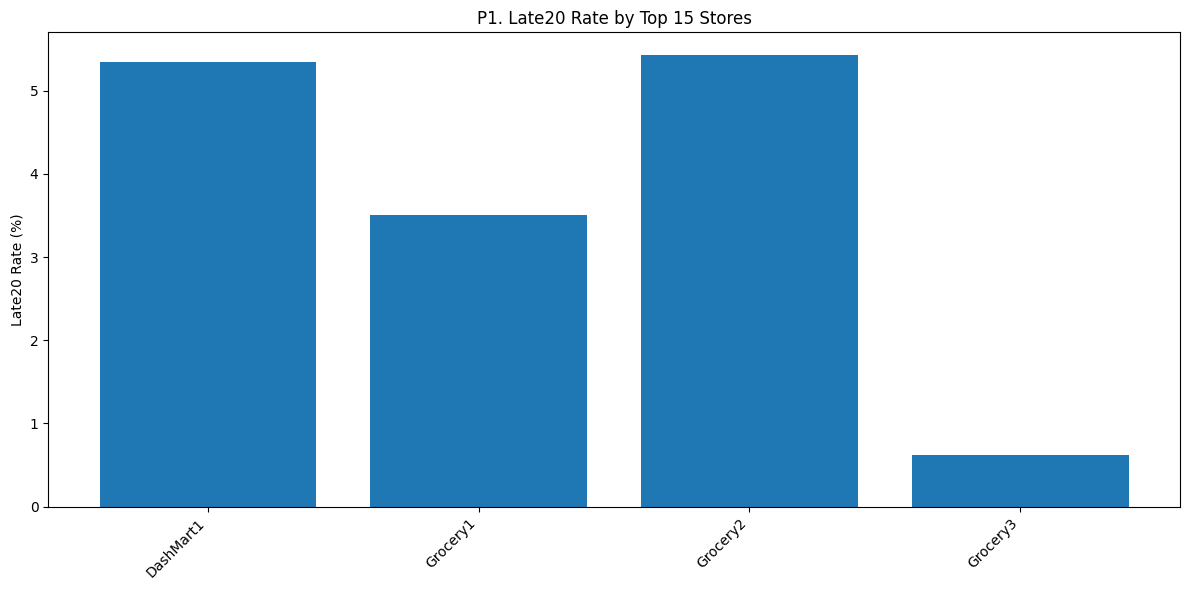

In [31]:
import matplotlib.pyplot as plt

# Late20 Rate by Store (Top 15)
top_stores = kpi_by_store.sort_values("Items_Requested", ascending=False).head(15)
plt.figure(figsize=(12,6))
plt.bar(top_stores["DELIV_STORE_NAME"], top_stores["Late20_Rate"]*100)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Late20 Rate (%)")
plt.title("P1. Late20 Rate by Top 15 Stores")
plt.tight_layout()
plt.show()


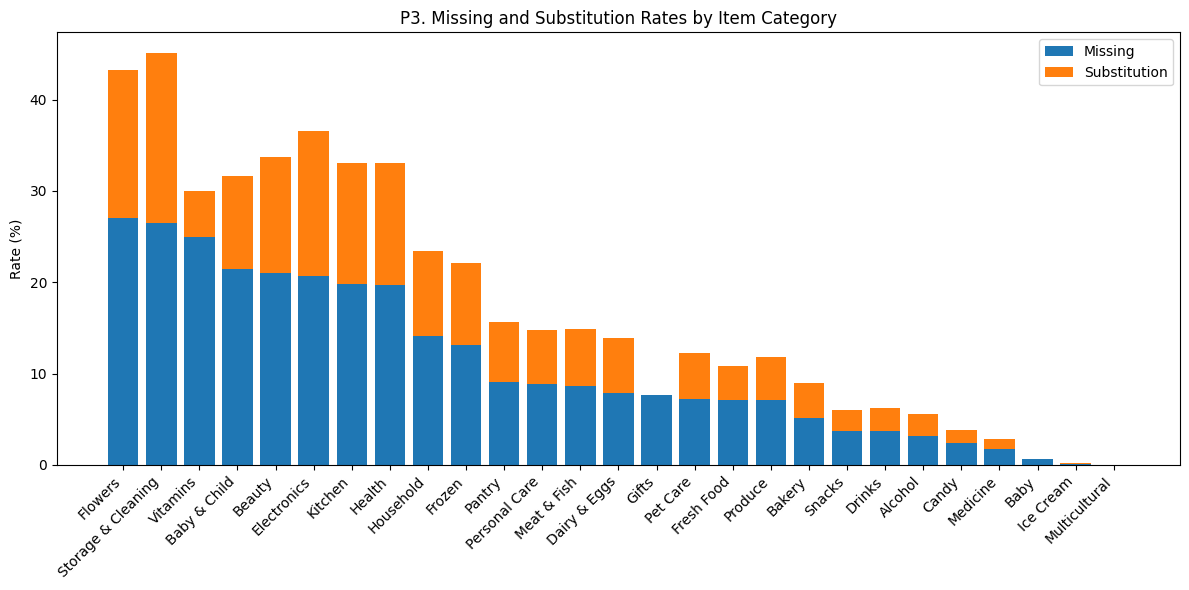

In [33]:
category_plot = kpi_by_category.sort_values("Item_Missing_Rate", ascending=False)
plt.figure(figsize=(12,6))
plt.bar(category_plot["ITEM_CATEGORY"], category_plot["Item_Missing_Rate"]*100, label="Missing")
plt.bar(category_plot["ITEM_CATEGORY"], category_plot["Item_Substitution_Rate"]*100,
        bottom=category_plot["Item_Missing_Rate"]*100, label="Substitution")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Rate (%)")
plt.title("P3. Missing and Substitution Rates by Item Category")
plt.legend()
plt.tight_layout()
plt.show()


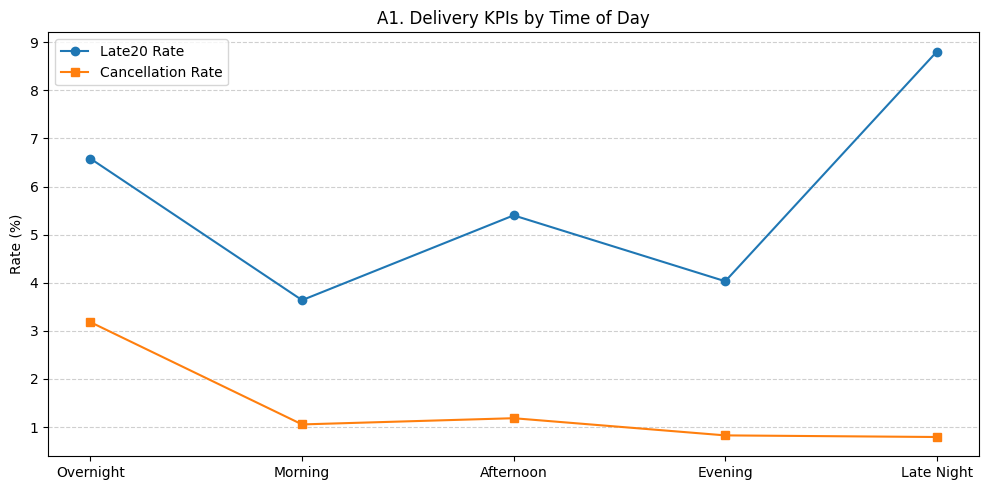

In [37]:
time_order = ["Overnight", "Morning", "Afternoon", "Evening", "Late Night"]
kpi_by_time_bucket["time_of_day"] = pd.Categorical(
    kpi_by_time_bucket["time_of_day"], categories=time_order, ordered=True
)
time_plot = kpi_by_time_bucket.sort_values("time_of_day")

plt.figure(figsize=(10,5))
plt.plot(time_plot["time_of_day"], time_plot["Late20_Rate"]*100, marker='o', label="Late20 Rate")
plt.plot(time_plot["time_of_day"], time_plot["Cancellation_Rate"]*100, marker='s', label="Cancellation Rate")
plt.ylabel("Rate (%)")
plt.title("A1. Delivery KPIs by Time of Day")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


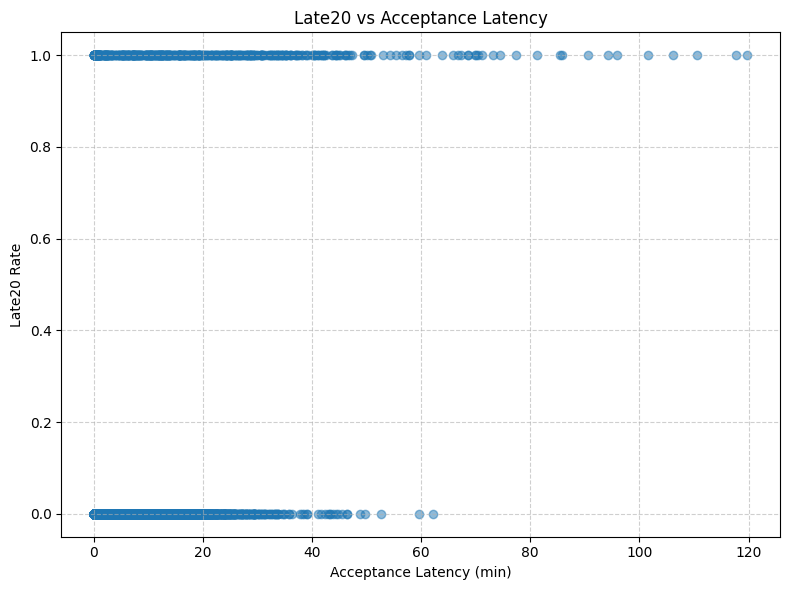

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(delivery_full["Acceptance_Latency"], delivery_full["Late20_Rate"], alpha=0.5)
plt.xlabel("Acceptance Latency (min)")
plt.ylabel("Late20 Rate")
plt.title("Late20 vs Acceptance Latency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


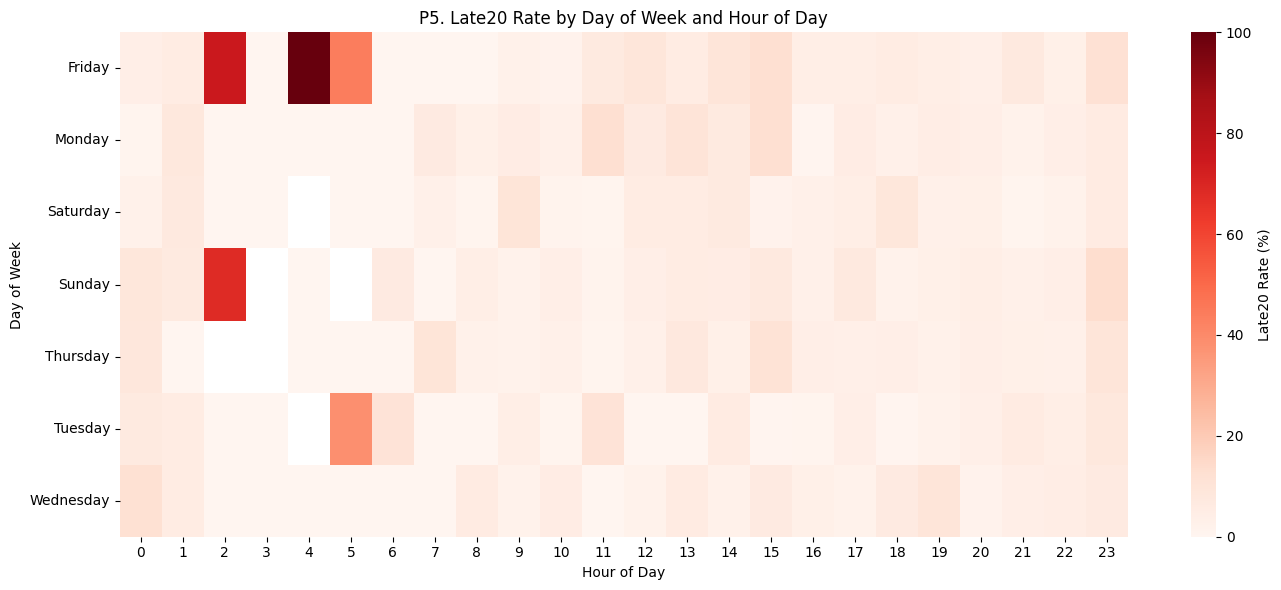

In [35]:
pivot = df.groupby(["day_of_week", "hour_of_day"])["DELIV_IS_20_MIN_LATE"].mean().unstack()
plt.figure(figsize=(14,6))
sns.heatmap(pivot*100, cmap="Reds", cbar_kws={'label': 'Late20 Rate (%)'})
plt.title("P5. Late20 Rate by Day of Week and Hour of Day")
plt.ylabel("Day of Week")
plt.xlabel("Hour of Day")
plt.tight_layout()
plt.show()


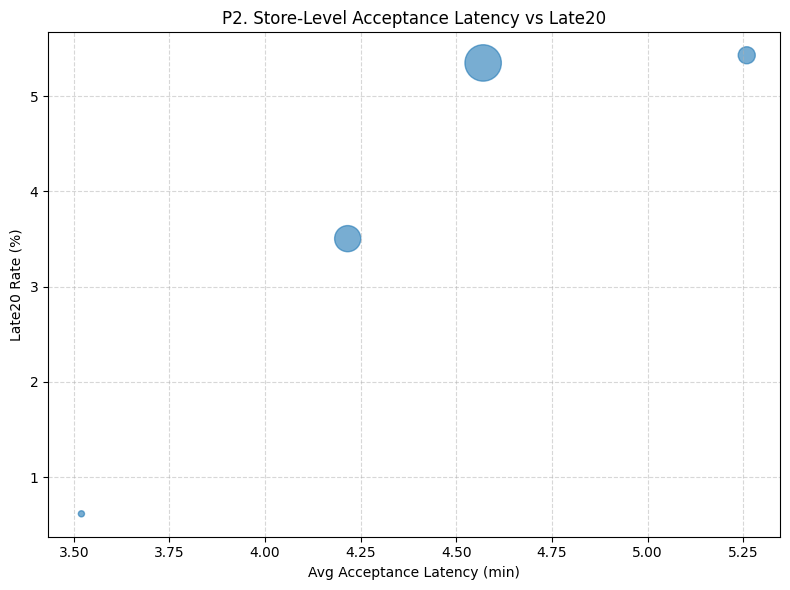

In [32]:
store_diag = kpi_by_store.copy()
plt.figure(figsize=(8,6))
plt.scatter(store_diag["Avg_CLAT"], store_diag["Late20_Rate"]*100,
            s=store_diag["Items_Requested"]/50, alpha=0.6)
plt.xlabel("Avg Acceptance Latency (min)")
plt.ylabel("Late20 Rate (%)")
plt.title("P2. Store-Level Acceptance Latency vs Late20")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


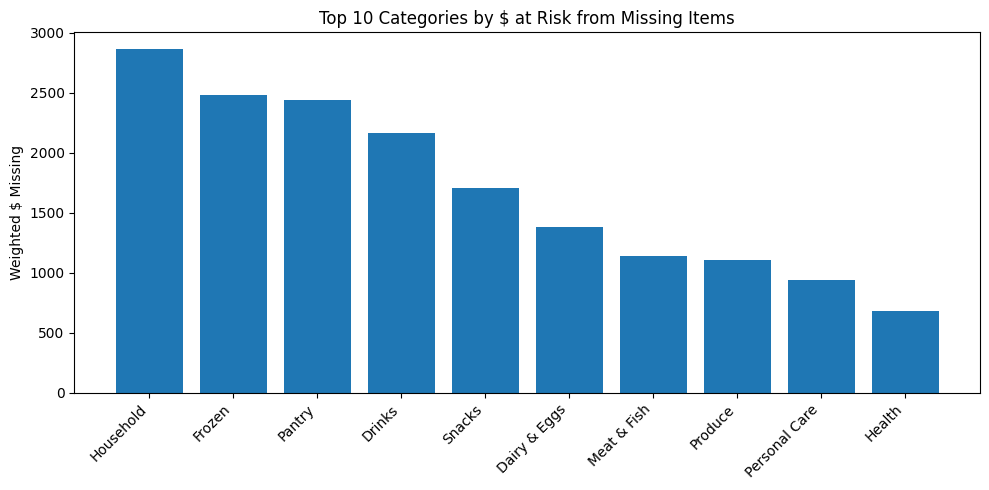

In [ ]:
cat_dollar = kpi_by_category.sort_values("Weighted_$Missing", ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.bar(cat_dollar["ITEM_CATEGORY"], cat_dollar["Weighted_$Missing"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Weighted $ Missing")
plt.title("Top 10 Categories by $ at Risk from Missing Items")
plt.tight_layout()
plt.show()


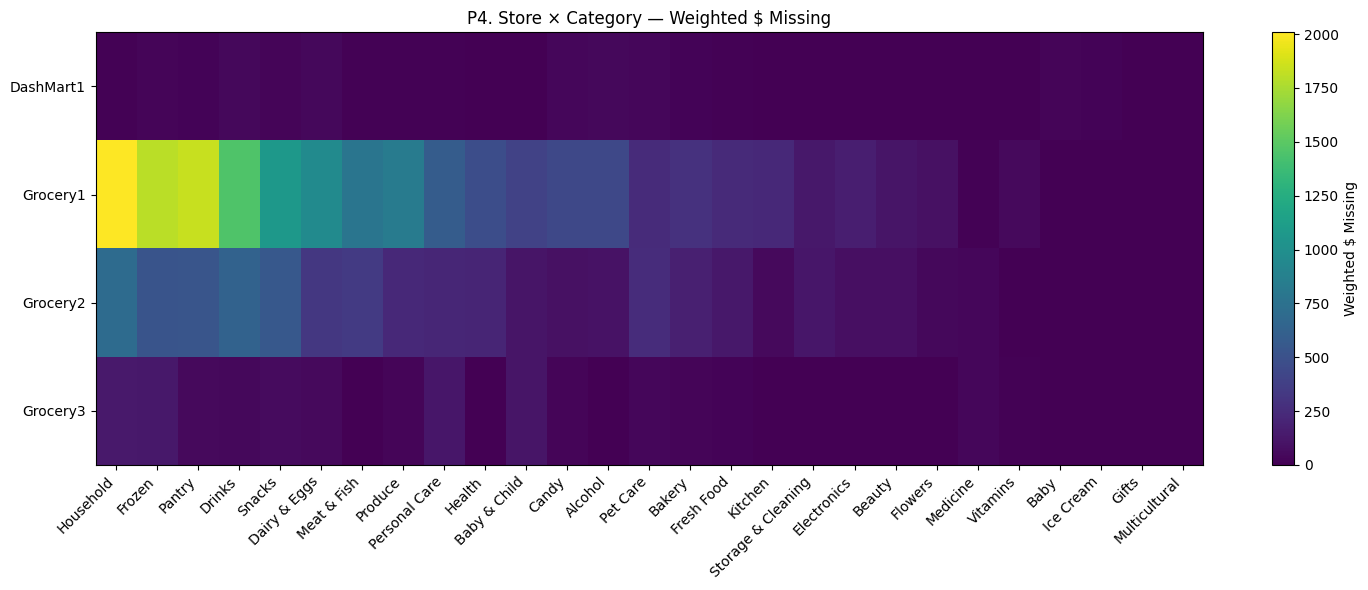

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Recompute store × category weighted missing values
store_cat = (
    df.assign(weighted_missing=lambda d: d["ITEM_PRICE"] * d["WAS_MISSING"])
      .groupby(["DELIV_STORE_NAME", "ITEM_CATEGORY"], as_index=False)["weighted_missing"].sum()
)

# Instead of topN, let's keep all categories that have > $0 missing for any store
pivot = store_cat.pivot(index="DELIV_STORE_NAME", columns="ITEM_CATEGORY", values="weighted_missing").fillna(0)

# Optional: sort columns by total missing value to make the chart more readable
pivot = pivot[pivot.sum().sort_values(ascending=False).index]

# Plot
plt.figure(figsize=(15, 6))
im = plt.imshow(pivot.values, aspect="auto")
plt.colorbar(im, label="Weighted $ Missing")
plt.xticks(ticks=np.arange(pivot.shape[1]), labels=pivot.columns, rotation=45, ha="right")
plt.yticks(ticks=np.arange(pivot.shape[0]), labels=pivot.index)
plt.title("P4. Store × Category — Weighted $ Missing")
plt.tight_layout()
plt.show()


/var/folders/kw/lryxk3xj4pgc3c96pl4_g6500000gn/T/ipykernel_5963/317560001.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_tod = (df.groupby("time_of_day")["is_cancelled"]


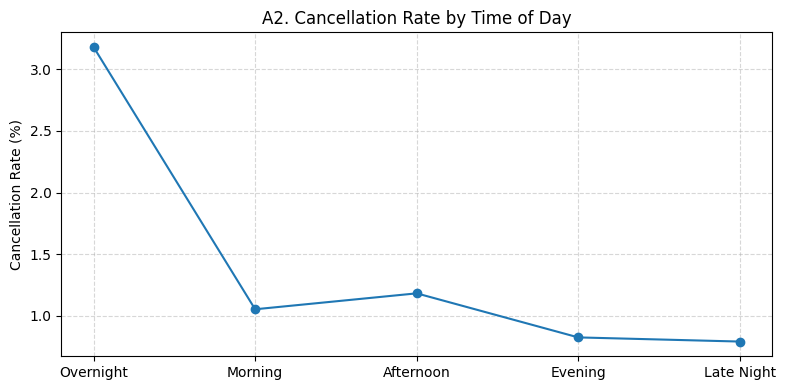

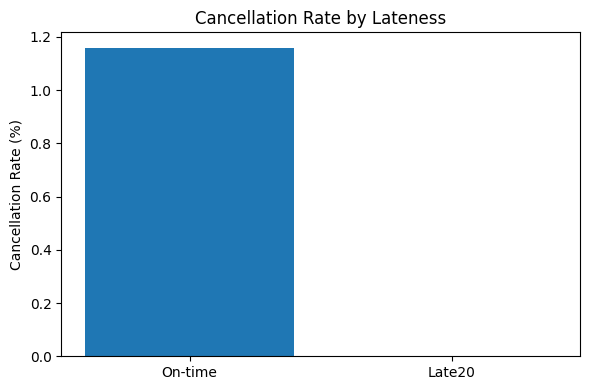

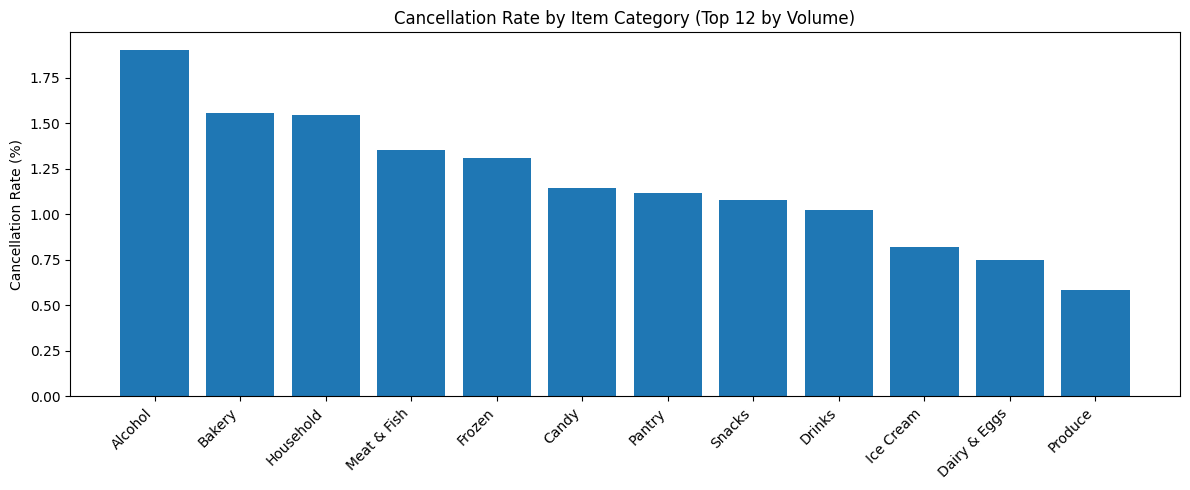

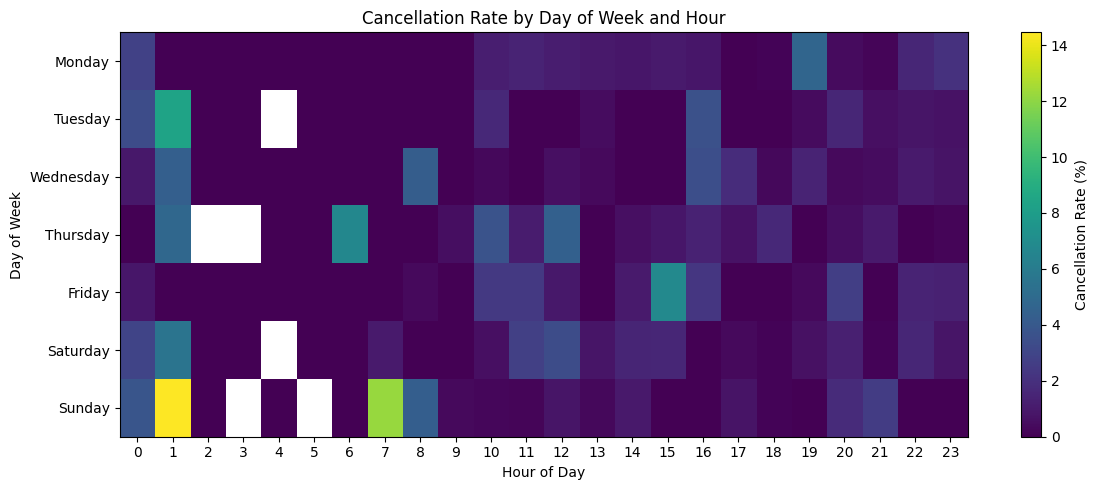

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Assumptions ---
# df has: DELIV_CANCELLED_AT (object/string), local_datetime (tz-aware),
#         DELIV_IS_20_MIN_LATE (0/1), ITEM_CATEGORY, time_of_day, day_of_week

# 0) Create a clean cancellation flag once
df["is_cancelled"] = df["DELIV_CANCELLED_AT"].notna().astype(int)

# 1) Cancellation rate by time_of_day
by_tod = (df.groupby("time_of_day")["is_cancelled"]
            .mean().reindex(["Overnight","Morning","Afternoon","Evening","Late Night"]))
plt.figure(figsize=(8,4))
plt.plot(by_tod.index, by_tod.values*100, marker='o')
plt.ylabel("Cancellation Rate (%)")
plt.title("A2. Cancellation Rate by Time of Day")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# 2) Cancellation rate by Late20 vs not (binary comparison)
by_late = (df.groupby(df["DELIV_IS_20_MIN_LATE"].astype(int))["is_cancelled"].mean())
by_late.index = ["On-time","Late20"]
plt.figure(figsize=(6,4))
plt.bar(by_late.index, by_late.values*100)
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Lateness")
plt.tight_layout()
plt.show()

# 3) Cancellation rate by Item Category (Top 12 by volume)
top_cats = df["ITEM_CATEGORY"].value_counts().head(12).index
cat_cancel = (df[df["ITEM_CATEGORY"].isin(top_cats)]
                .groupby("ITEM_CATEGORY")["is_cancelled"].mean().sort_values(ascending=False))
plt.figure(figsize=(12,5))
plt.bar(cat_cancel.index, cat_cancel.values*100)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Item Category (Top 12 by Volume)")
plt.tight_layout()
plt.show()

# 4) Bonus: 2D heatmap — Cancellation Rate by Day of Week × Hour
df["hour_of_day"] = df["local_datetime"].dt.hour  # already created earlier; re-create if needed
dow_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
heat = (df.groupby(["day_of_week","hour_of_day"])["is_cancelled"]
          .mean().unstack().reindex(dow_order))
plt.figure(figsize=(12,5))
im = plt.imshow(heat.values*100, aspect="auto")
plt.colorbar(im, label="Cancellation Rate (%)")
plt.yticks(ticks=np.arange(len(dow_order)), labels=dow_order)
plt.xticks(ticks=np.arange(24), labels=np.arange(24))
plt.title("Cancellation Rate by Day of Week and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()


In [ ]:
filename = "doordash_analysis.csv"
try:
    df.to_csv(filename, index=False)
    print(f"Saved {len(df)} rows to {filename}")
except Exception as e:
    print("Failed to save CSV:", e)


Saved 60580 rows to doordash_analysis.csv


In [30]:
from pathlib import Path

out_dir = Path.home() / "Downloads"
out_dir.mkdir(parents=True, exist_ok=True)
out_file = out_dir / "doordash_analysis.csv"

try:
    df.to_csv(out_file, index=False)
    print(f"Saved {len(df)} rows to {out_file}")
except Exception as e:
    print("Failed to save CSV:", e)

Saved 60580 rows to /Users/adamoubaita/Downloads/doordash_analysis.csv
